In [1]:
import numpy as np
import pandas as pd
import mglearn
import IPython
import scipy as sp

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (20, 10)

C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Linear regression

- 선형 회귀의 핵심은 MSE
- 매개변수가 없는 것이 장점이자 단점( 모델의 복잡도 제어 방법 없음 )

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [3]:
print(f'훈련 정확도: {lr.score(X_train, y_train)}')
print(f'테스트 정확도: {lr.score(X_test, y_test)}')

훈련 정확도: 0.6700890315075756
테스트 정확도: 0.65933685968637


- 위의 결과는 과소 적합인 상태를 의미함.
- 본 데이터셋은 1차원( 특성 1개 )으로 모델의 과대적합을 걱정할 필요가 없음.
- 이보다 특성 수가 많은 데이터셋을 lr 모델에 적용할 경우에, 어떻게 동작하는지 알아 볼 필요가 있음.

In [4]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print(f'훈련 정확도: {lr.score(X_train, y_train):.2f}')
print(f'테스트 정확도: {lr.score(X_test, y_test):.2f} ')

훈련 정확도: 0.95
테스트 정확도: 0.61 


- 훈련 정확도는 높은 반면, 테스트 정확도가 크게 떨어짐.
- 이는 과대적합되었다는 확실한 신호임.
- 모델 복잡도를 조정하기 위해서 Ridge 사용

# Ridge

- 가중치(w)의 절댓값을 가능한 한 작게 만들어 과대적합 문제를 해소한 회귀 선형 모델
- Regularization 적용 이유는,\
Bias 수치가 높아지더라도 Variance가 그보다 더 낮아지면 MSE 값을 더 낮출 수 있기 때문임. ( E( y - y^ | X )^2 )식 참고 
- L2 규제 이용 ( w^2 ) ==> λ(↑), t(↓) 일수록 페널티 효과 ↑

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1).fit(X_train, y_train)

print(f'훈련 정확도: {ridge.score(X_train, y_train):.2f}')
print(f'테스트 정확도: {ridge.score(X_test, y_test):.2f} ')

훈련 정확도: 0.93
테스트 정확도: 0.77 


- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아짐.
- 선형 회귀의 훈련 데이터 성능이 감소 ( 데이터가 많아질수록 모델이 데이터를 기억하거나 고대적합하기 어려워지기 때문 )

# Lasso ( Least Absolute Shrinkage and Selection Operator )

- Ridge 는 제약식에서 계수의 제곱을 sum하여 사용하는 반면, Lasso의 제약식에서는 계수의 절댓값의 sum을 사용
- 'Selection' 의 의미는 제약식의 parameter를 조정함으로써 feature selection이 자동으로 이뤄지는 점을 의미함 ( 그래프 상에서 제약식은 마름모꼴 형태를 가짐)
-  λ(↑), t(↓) 일수록 제약이 커지면서 변수의 갯수가 적어짐.
- Feature selection 이 자동으로 진행되기 때문에, 제약 parameter를 조정할 때 max_iter의 값도 조정해줘야 함. 

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'훈련 세트 점수 : {lasso.score(X_train, y_train) :.2f}')
print(f'테스트 세트 점수 : {lasso.score(X_test, y_test) :.2f}')
print(f'사용한 특성의 개수 : {np.sum(lasso.coef_!=0)}')

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 : 4


In [10]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f'훈련 세트 점수 : {lasso001.score(X_train, y_train) :.2f}')
print(f'테스트 세트 점수 : {lasso001.score(X_test, y_test) :.2f}')
print(f'사용한 특성의 개수 : {np.sum(lasso001.coef_!=0)}')

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 : 33


# 선형 분류 모델 ( LR, SVM )
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 기본적으로 두 모델은 L2규제를 사용함
- parameter : C ( C 가 높아지면 규제가 감소, 이는 훈련 데이터에 더욱 적합하게 학습하는 것을 의미 )

C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


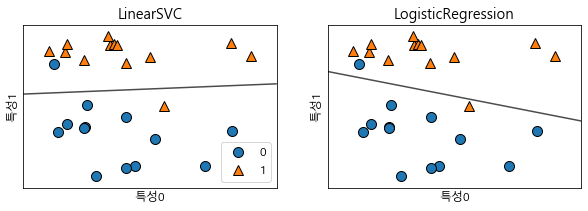

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots( 1, 2, figsize = (10, 3) )

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax = ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
axes[0].legend()

- C = 1 (기본값) 

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print(f'훈련 정확도: {logreg.score(X_train, y_train):.3f}')
print(f'테스트 정확도: {logreg.score(X_test, y_test):.3f} ')

훈련 정확도: 0.941
테스트 정확도: 0.965 


C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- C = 100 ( 규제 완화 )

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(C=100).fit(X_train, y_train)
print(f'훈련 정확도: {logreg.score(X_train, y_train):.3f}')
print(f'테스트 정확도: {logreg.score(X_test, y_test):.3f} ')

훈련 정확도: 0.951
테스트 정확도: 0.958 


C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- C = 0.01 ( 규제 강화 )

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(C = 0.01).fit(X_train, y_train)
print(f'훈련 정확도: {logreg.score(X_train, y_train):.3f}')
print(f'테스트 정확도: {logreg.score(X_test, y_test):.3f} ')

훈련 정확도: 0.937
테스트 정확도: 0.930 


C:\Users\mb910\Anaconda3\envs\introml\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
